In [5]:
import pandas as pd
df = pd.read_csv(r'F:/Airline_Delay.csv')

In [7]:
df

,year,month,carrier,carrier_name,airport,arr_flights,arr_del15,arr_cancelled,arr_delay,carrier_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,89.0,13.0,2.0,1375.0,71.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,62.0,10.0,0.0,799.0,218.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,62.0,10.0,1.0,766.0,56.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,66.0,12.0,1.0,1397.0,471.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,92.0,22.0,2.0,1530.0,628.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...
151400,2014,1,WN,Southwest Airlines Co.,SJU,282.0,125.0,5.0,6793.0,2627.0,2885.0
151401,2014,1,WN,Southwest Airlines Co.,SLC,889.0,299.0,17.0,17724.0,6330.0,10045.0
151402,2014,1,WN,Southwest Airlines Co.,SMF,1813.0,540.0,37.0,29340.0,7974.0,20305.0
151403,2014,1,WN,Southwest Airlines Co.,SNA,1367.0,340.0,24.0,16193.0,4445.0,11000.0


In [29]:
#count number of flights by each airline
flights_by_airline = df['carrier'].value_counts()
print(flights_by_airline)

carrier
OO    22709
DL    14310
MQ    10893
AA    10403
UA     9914
WN     9641
EV     8803
G4     8280
F9     8170
AS     7357
9E     7029
B6     6548
OH     6190
YV     5988
YX     5727
NK     4301
HA     1868
QX     1157
US      892
VX      824
FL      401
Name: count, dtype: int64


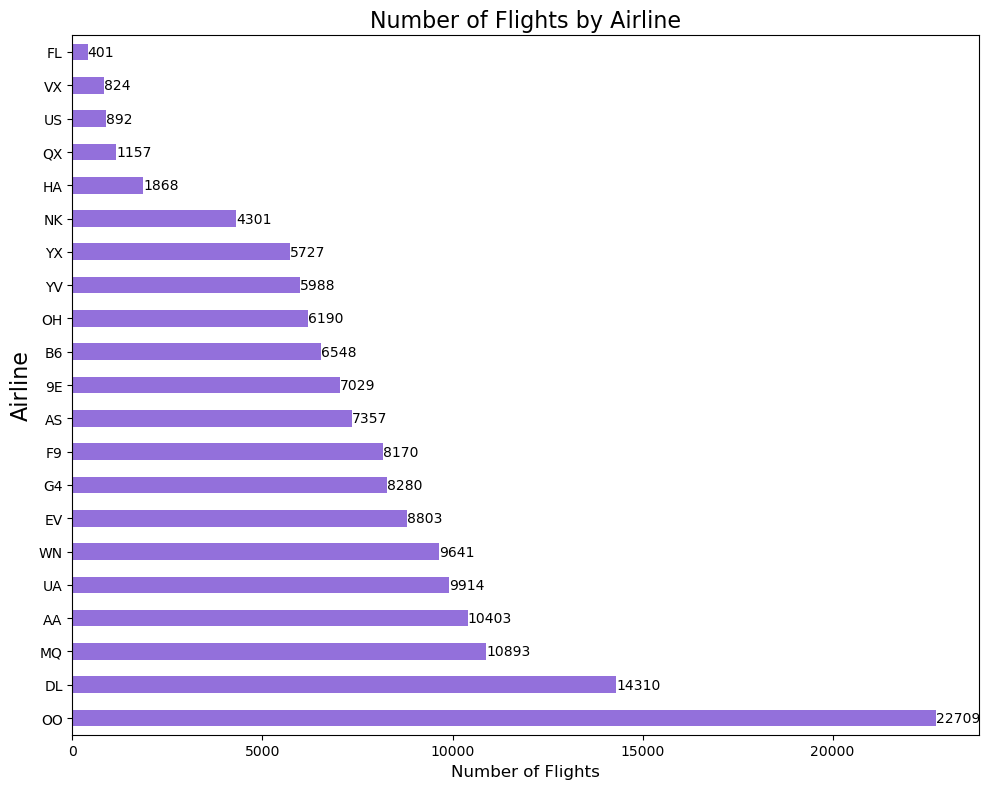

In [71]:
import matplotlib.pyplot as plt
flights_by_airline = df['carrier'].value_counts()
plt.figure(figsize=(10, 8))
flights_by_airline.plot(kind='barh', color='mediumpurple')
plt.title('Number of Flights by Airline', fontsize=16)
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Airline', fontsize=16)
for index, value in enumerate(flights_by_airline):
    plt.text(value, index, str(value), va='center')
    plt.tight_layout()
plt.show()

In [73]:
#count number of cancelled flights by year
cancelled_airline = df['year'].value_counts()
print(cancelled_airline)

year
2019    20946
2022    20345
2018    20213
2021    19954
2020    18859
2014    13980
2017    12518
2023    12373
2016    12217
Name: count, dtype: int64


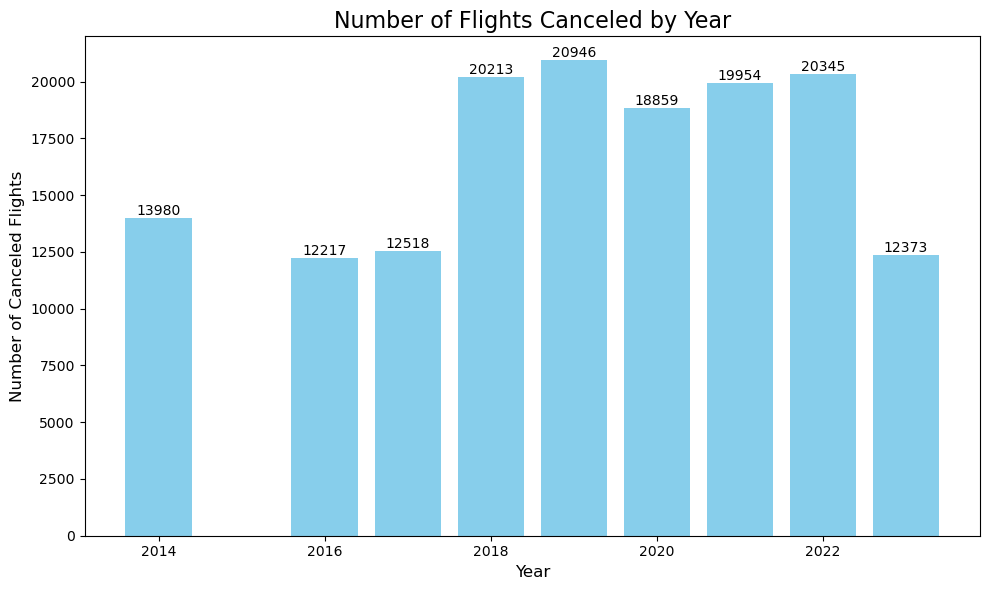

In [77]:
plt.figure(figsize=(10, 6))
bars = plt.bar(cancelled_airline.index, cancelled_airline.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.title('Number of Flights Canceled by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Canceled Flights', fontsize=12)
plt.tight_layout()
plt.show()

In [89]:
cancelled_by_carrier_year = df.groupby(['carrier_name'])['arr_cancelled'].sum().reset_index()
cancelled_by_carrier_year.columns = ['Carrier_Name', 'Cancelled_Flights']
print(cancelled_by_carrier_year)

                    Carrier_Name  Cancelled_Flights
0    AirTran Airways Corporation             1516.0
1           Alaska Airlines Inc.            24910.0
2                  Allegiant Air            24303.0
3         American Airlines Inc.           152049.0
4   American Eagle Airlines Inc.             8358.0
5           Delta Air Lines Inc.            81172.0
6              Endeavor Air Inc.            30051.0
7                      Envoy Air            59281.0
8       ExpressJet Airlines Inc.            63576.0
9        ExpressJet Airlines LLC             8198.0
10        Frontier Airlines Inc.            21405.0
11        Hawaiian Airlines Inc.             4647.0
12                   Horizon Air             3608.0
13               JetBlue Airways            54733.0
14            Mesa Airlines Inc.            29115.0
15             PSA Airlines Inc.            43897.0
16              Republic Airline            55345.0
17         SkyWest Airlines Inc.           124149.0
18        So

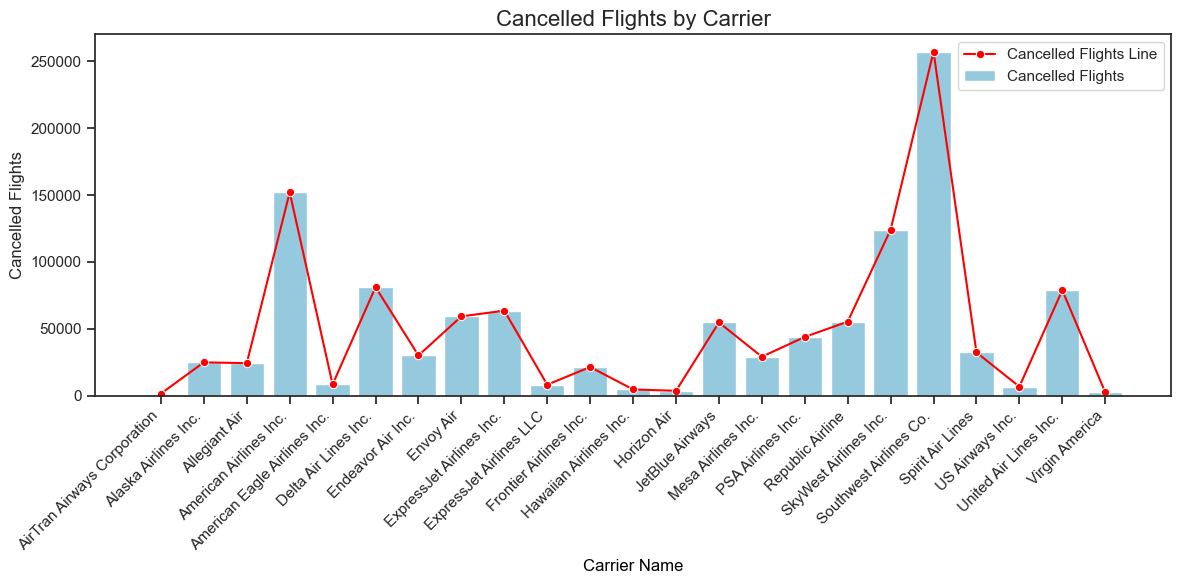

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Carrier_Name', y='Cancelled_Flights', data=cancelled_by_carrier_year, color='skyblue', label='Cancelled Flights')
line_plot = sns.lineplot(x='Carrier_Name', y='Cancelled_Flights', data=cancelled_by_carrier_year, marker='o', color='red', label='Cancelled Flights Line')
plt.xticks(rotation=45)
line_plot.set_xticks(range(len(cancelled_by_carrier_year)))
line_plot.set_xticklabels(cancelled_by_carrier_year['Carrier_Name'], rotation=45, ha='right')
plt.title('Cancelled Flights by Carrier', fontsize=16)
plt.xlabel('Carrier Name', fontsize=12, color='black')
plt.ylabel('Cancelled Flights', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [139]:
total_delays = df.groupby('carrier_name')[['arr_delay','carrier_delay','late_aircraft_delay']].sum().reset_index()
print(total_delays)

                    carrier_name    arr_delay  carrier_delay  \
0    AirTran Airways Corporation     678612.0       166873.0   
1           Alaska Airlines Inc.   14204634.0      4279124.0   
2                  Allegiant Air   10837875.0      3548382.0   
3         American Airlines Inc.   93769382.0     32982943.0   
4   American Eagle Airlines Inc.    1542855.0       390147.0   
5           Delta Air Lines Inc.   69640641.0     29557650.0   
6              Endeavor Air Inc.   14106314.0      4356689.0   
7                      Envoy Air   20030182.0      4914011.0   
8       ExpressJet Airlines Inc.   26604029.0      9343740.0   
9        ExpressJet Airlines LLC    2487859.0       761681.0   
10        Frontier Airlines Inc.   18310435.0      5241981.0   
11        Hawaiian Airlines Inc.    3515595.0      2058693.0   
12                   Horizon Air    1454145.0       534207.0   
13               JetBlue Airways   41175024.0     14801688.0   
14            Mesa Airlines Inc.   12752

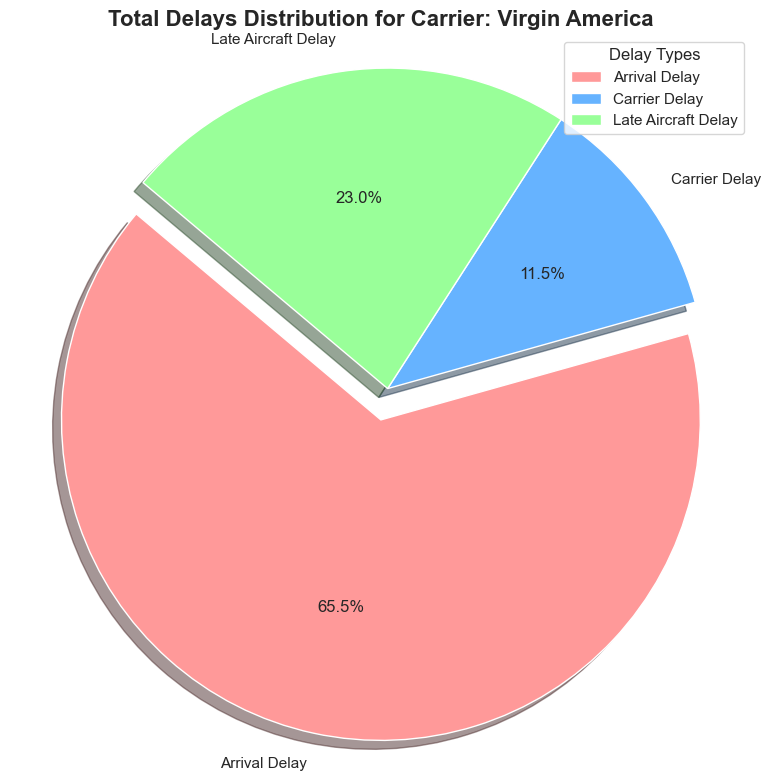

In [147]:
import matplotlib.pyplot as plt
latest_carrier_name = total_delays['carrier_name'].max()
latest = total_delays[total_delays['carrier_name'] == latest_carrier_name].iloc[0]
delay_types = ['Arrival Delay', 'Carrier Delay', 'Late Aircraft Delay']
delay_values = [latest['arr_delay'], latest['carrier_delay'], latest['late_aircraft_delay']]
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0) 
plt.pie(delay_values, 
        labels=delay_types, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#FF9999', '#66B3FF', '#99FF99'],
        explode=explode, 
        shadow=True) 
plt.title(f'Total Delays Distribution for Carrier: {latest_carrier_name}', fontsize=16, fontweight='bold')
plt.legend(delay_types, title="Delay Types", loc='upper right')
plt.axis('equal') 
plt.tight_layout() 
plt.show()
